Programación probabilística
=====
y métodos bayesianos para hackers.
========

##### versión 0.1

'Contenido original creado por CAM Davidson-Pilon`

`Portado a Python 3 y Pymc3 por Max Margenot (@Clean_Utensils) y Thomas Wiecki (@twiecki) en Quantopian (@Quantopian)`
___


Bienvenido a * Métodos bayesianos para hackers *.El repositorio completo de GitHUB está disponible en [GitHB / Probabilistic-Programing-Programing-y-Bayesian-Methods-for-hackers] (https://github.com/camdavidsonpilon/probabababababababababababababababababababababilistic-programming-and-bayesian-methods-for-hackers).Los otros capítulos se pueden encontrar en la [página de inicio] del proyecto (https://camdavidsonpilon.github.io/probabababilistic-programming-and-bayesian-methods-for-hackers/).¡Esperamos que disfrute del libro, ¡y fomentamos alguna contribución!

Capítulo 1
======
***

La filosofía de la inferencia bayesiana.
------
  
> Eres un programador experto, pero los insectos aún se deslizan en su código. Después de una implementación particularmente difícil de un algoritmo, usted decide probar su código en un ejemplo trivial. Pasó. Usted prueba el código en un problema más difícil. Pasa una vez más. Y pasa a la siguiente, * aún más difícil *, ¡prueba también! Está empezando a creer que no puede haber errores en este código ...

Si crees de esta manera, entonces felicidades, ¡ya estás pensando en Bayesian! La inferencia bayesiana simplemente está actualizando sus creencias después de considerar nuevas pruebas. Un bayesiano rara vez puede estar seguro de un resultado, pero él o ella puede ser muy seguro. Al igual que en el ejemplo anterior, nunca podemos estar 100% seguros de que nuestro código esté libre de errores a menos que lo pruebemos en cada problema posible; algo raramente posible en la práctica. En su lugar, podemos probarlo en una gran cantidad de problemas, y si sucede, podemos sentirnos más * Confiado * sobre nuestro código, pero aún no está seguro. La inferencia bayesiana funciona de manera idéntica: actualizamos nuestras creencias sobre un resultado; Rara vez podemos estar absolutamente seguros a menos que descarte todas las demás alternativas.

### el estado mental bayesiano


La inferencia bayesiana difiere de una inferencia estadística más tradicional al preservar * incertidumbre *. Al principio, esto suena como una mala técnica estadística. ¿No se trata de las estadísticas acerca de derivar * certeza * de la aleatoriedad? Para reconciliar esto, debemos comenzar a pensar como bayesianos.

La visión mundial de Bayesia interpreta la probabilidad como medida de la creación de la "creimiento en un evento *, es decir, qué confianza estamos en un evento que ocurre. De hecho, veremos en un momento que esta es la interpretación natural de la probabilidad.

Para que esto sea más claro, consideramos una interpretación alternativa de probabilidad: * FRECUENTEST *, conocido como la versión más * clásica * de las estadísticas, asume que la probabilidad es la frecuencia de eventos a largo plazo (de ahí el título otorgado). Por ejemplo, la * probabilidad de accidentes de avión * bajo una filosofía de frecuentos se interpreta como la * frecuencia a largo plazo de accidentes de aviones *. Esto hace que la sensación lógica para muchas probabilidades de eventos, pero se vuelve más difícil de entender cuando los eventos no tienen una frecuencia de ocurrencias a largo plazo. Considere: A menudo asignamos probabilidades a los resultados de las elecciones presidenciales, ¡pero la elección en sí misma solo sucede una vez! Los frecuentes se acercan esto al invocar realidades alternativas y decir en todas estas realidades, la frecuencia de las ocurrencias define la probabilidad.

Bayesianos, por otro lado, tienen un enfoque más intuitivo. Los bayesianos interpretan una probabilidad como medida de * creencia *, o confianza, de un evento que ocurre. Simplemente, una probabilidad es un resumen de una opinión. Una persona que asigna una creencia de 0 a un evento no tiene ninguna confianza que ocurrirá el evento; A la inversa, asignar una creencia de 1 implica que el individuo está absolutamente seguro de un evento que ocurra. Las creencias entre 0 y 1 permiten ponderaciones de otros resultados. Esta definición está de acuerdo con la probabilidad de un ejemplo de accidentes planos, por haber observado la frecuencia de los accidentes planos, la creencia de un individuo debe ser igual a esa frecuencia, excluyendo cualquier información externa. Del mismo modo, en virtud, en virtud de esta definición de probabilidad igual a las creencias, es significativo hablar sobre las probabilidades (creencias) de los resultados de las elecciones presidenciales: ¿qué tan seguro eres candidato * A * ganará?

Aviso en el párrafo anterior, asigné la creencia (probabilidad) medir a un * individual *, no a la naturaleza. Esto es muy interesante, ya que esta definición deja espacio para creencias en conflicto entre individuos. Nuevamente, esto es apropiado para lo que ocurre naturalmente: diferentes individuos tienen diferentes creencias de eventos que ocurren, porque poseen información diferente * sobre el mundo. La existencia de diferentes creencias no implica que nadie esté mal. Considere los siguientes ejemplos que demuestran la relación entre las creencias y las probabilidades individuales:

- Flipa una moneda, y ambos adivinamos el resultado. Ambos estaríamos de acuerdo, suponiendo que la moneda es justa, que la probabilidad de cabezas es 1/2. Supongamos, entonces, que me visto en la moneda. Ahora sé con certeza cuál es el resultado: Asigno probabilidad 1.0 a las cabezas o colas (lo que sea). Ahora, ¿qué es * tu * creencia de que la moneda es cabezas?Mi conocimiento del resultado no ha cambiado los resultados de la moneda. Por lo tanto, asignamos diferentes probabilidades al resultado.

- Su código tiene un error en él o no, pero no sabemos con certeza, lo cual es cierto, aunque tenemos una creencia sobre la presencia o ausencia de un error.

- Un paciente médico está exhibiendo síntomas $ x $, $ y $ y $ Z $. Hay una serie de enfermedades que podrían estar causando a todos, pero solo hay una enfermedad única. Un médico tiene creencias sobre qué enfermedad, pero un segundo médico puede tener creencias ligeramente diferentes.


Esta filosofía de tratar las creencias como probabilidad es natural para los humanos. Lo empleamos constantemente a medida que interactuamos con el mundo y solo vemos verdades parciales, pero recopilamos evidencia para formar creencias. Alternativamente, tienes que estar * entrenado * para pensar como un frecentista.

Para alinearnos con la notación de probabilidad tradicional, denotamos nuestra creencia sobre el evento $ A $ como $ P (A) $. Llamamos a esta cantidad la * probabilidad previa *.

John Maynard Keynes, un gran economista y un pensador, dijo: "Cuando los hechos cambian, cambio de opinión. ¿Qué haces, señor?" Esta cita refleja la forma en que un bayesiano actualiza sus creencias después de ver evidencia. Incluso y mdash; especialmente y mdash; Si la evidencia es contraria a lo que se creía inicialmente, la evidencia no puede ser ignorada. Denotamos nuestra creencia actualizada como $ P (a | x) $, interpretada como la probabilidad de $ A $ dada la evidencia $ X $. Llamamos a la creencia actualizada la * probabilidad posterior * para contrastarla con la probabilidad previa. Por ejemplo, considere las probabilidades posteriores (lee: creencias posteriores) de los ejemplos anteriores, después de observar alguna evidencia $ x $:

1 \. $ P (a): \; \; $ La moneda tiene una probabilidad del 50 por ciento de ser cabezas. $ P (a | x): \; \; $. Mira la moneda, observa que a las cabezas ha aterrizado, denota esta información $ x $, y asigna trivialmente probabilidad de 1.0 a las cabezas y 0.0 a las colas.

2 \. $ P (a): \; \; $ Este código grande y complejo probablemente tiene un error en él. $ P (a | x): \; \; $ El código pasó todas las pruebas de $ x $; Todavía podría haber un error, pero su presencia es menos probable que ahora.

3 \. $ P (a): \; \; $ El paciente podría tener cualquier número de enfermedades. $ P (a | x): \; \; $ Realización de un análisis de sangre generado Evidencia de $ X $, descargando algunas de las posibles enfermedades de la consideración.


Está claro que en cada ejemplo no descartamos completamente la creencia previa después de ver la nueva evidencia de $ X $, pero nosotros * volvimos a ponderar al anterior * para incorporar la nueva evidencia (es decir, ponemos más peso o confianza, en algunas creencias versus otros).

Al introducir la incertidumbre previa sobre los eventos, ya estamos admitiendo que cualquier conjetura que hagamos está potencialmente muy mal. Después de observar datos, evidencia u otra información, actualizamos nuestras creencias, y nuestra conjetura se vuelve menos errónea *. Este es el lado alternativo de la moneda de predicción, donde normalmente intentamos ser * más correctos *.

### inferencia bayesiana en la práctica

 Si el frecentista y la inferencia bayesiana fueron funciones de programación, con los insumos que son problemas estadísticos, los dos serían diferentes en lo que regresan al usuario. La función de inferencia de frecuentistas devolvería un número, lo que representaría una estimación (generalmente una estadística de resumen como el promedio de la muestra, etc.), mientras que la función bayesiana volvería * probabilidades *.

Por ejemplo, en nuestro problema de depuración anterior, llamando a la función del frecentista con el argumento "Mi código aprobó todas las pruebas de $ X $; ¿Mi código está libre de errores?" devolvería un * sí *. Por otro lado, preguntando a nuestra función de Bayesia "A menudo, mi código tiene errores. Mi código aprobó todas las pruebas de $ X $; ¿Mi código está libre de errores?" Devolvería algo muy diferente: probabilidades de * Sí * y * No *. La función podría devolver:


> * Sí *, con probabilidad 0.8; * No *, con probabilidad 0.2



Esto es muy diferente de la respuesta que se devuelve la función de frecuentismo. Observe que la función Bayesia aceptó un argumento adicional: * "A menudo, mi código tiene errores" *. Este parámetro es el * previo *. Al incluir el parámetro anterior, estamos diciendo que la función bayesiana incluya nuestra creencia sobre la situación. Técnicamente, este parámetro en la función bayesiano es opcional, pero veremos excluyendo que tiene sus propias consecuencias.


#### Incorporando evidencia

A medida que adquirimos cada vez más ejemplos de evidencia, nuestra creencia previa está * lavada * por la nueva evidencia. Esto es de esperar. Por ejemplo, si su creencia previa es algo ridículo, como "Espero que el Sol explote hoy", y cada día se le resulte equivocado, esperará que cualquier inferencia lo corrija, o al menos alinee mejor sus creencias. La inferencia bayesiana corregirá esta creencia.


Denote $ N $ como el número de instancias de evidencia que poseemos. A medida que recopilamos una cantidad de evidencia * infinita *, digamos como $ n \ rudowarrow \ infty $, nuestros resultados bayesianos (a menudo) se alinean con resultados de frecuentes. Por lo tanto, por un gran $ n $, la inferencia estadística es más o menos objetiva. Por otro lado, por pequeño $ N $, la inferencia es mucho más * inestable *: Las estimaciones de frecuentistas tienen más varianza y intervalos de confianza más grandes. Aquí es donde el análisis bayesiano sobresale. Al introducir una probabilidad previa y devolución (en lugar de una estimación escalar), nosotros * preservamos la incertidumbre * que refleja la inestabilidad de la inferencia estadística de un pequeño conjunto de datos de $ n $.

Uno puede pensar que durante $ N $ $, uno puede ser indiferente entre las dos técnicas, ya que ofrecen una inferencia similar, y pueden inclinarse hacia los métodos de frecuencia más simples y computacionalmente. Una persona en esta posición debe considerar la siguiente cotización por Andrew Gelman (2005) [1], antes de tomar tal decisión:

> Los tamaños de muestra nunca son grandes. Si $ N $ es demasiado pequeño para obtener una estimación suficientemente precisa, debe obtener más datos (o hacer más suposiciones). Pero una vez que $ N $ es "lo suficientemente grande", puede comenzar a subdividir los datos para obtener más información (por ejemplo, en una encuesta de opinión pública, una vez que tenga una buena estimación para todo el país, puede estimar entre hombres y mujeres, norteños y los sureños, diferentes grupos de edad, etc.). $ N $ nunca es suficiente porque si fuera "lo suficiente", ya estarías en el siguiente problema para el que necesitas más datos.

### ¿Los métodos frecuentes son incorrectos entonces?

**No.**

Los métodos frecuentes siguen siendo útiles o de última generación en muchas áreas. Las herramientas como mínimos cuadrados, la regresión lineal, la regresión de lazo y los algoritmos de maximización de la expectativa son todos poderosos y rápidos. Los métodos bayesianos complementan estas técnicas mediante la solución de problemas que estos enfoques no pueden, o al iluminar el sistema subyacente con un modelado más flexible.


#### A Nota en * Big Data *
Paradójicamente, los problemas analíticos predictivos de los grandes datos se resuelven en realidad por algoritmos relativamente simples [2] [4]. Por lo tanto, podemos argumentar que la dificultad de predicción de los grandes datos no se encuentra en el algoritmo utilizado, sino en las dificultades computacionales de almacenamiento y ejecución en grandes datos. (Uno también debe considerar la cita de Gelman desde arriba y pregunte "¿Realmente tengo datos grandes?")

Los problemas analíticos mucho más difíciles involucran * datos medios * y, especialmente problemáticos, * datos realmente pequeños *. Utilizando un argumento similar a la de Gelman anterior, si los problemas de datos grandes son lo suficientemente grandes *, se resolverán fácilmente, deberíamos estar más interesados ​​en los conjuntos de datos * no bastante grandes, lo suficientemente grandes.

### Nuestro marco bayesiano

Estamos interesados en las creencias, que pueden interpretarse como probabilidades pensando en Bayesian.Tenemos una creencia de * previa * en el evento $ A $, creencias formadas por información anterior, por ejemplo, nuestra creencia previa sobre los errores que están en nuestro código antes de realizar pruebas.

En segundo lugar, observamos nuestra evidencia.Para continuar con nuestro ejemplo de código de buggy: si nuestro código pasa las pruebas de $ X $, queremos actualizar nuestra creencia para incorporar esto.Llamamos a esta nueva creencia la probabilidad * posterior *.Actualización de nuestra creencia se realiza a través de la siguiente ecuación, conocida como teorema de Bayes, después de su descubridor Thomas Bayes:

\ comienzan {align}
 P (a | x) = & \ frac {p (x | a) p (a)} {p (x)} \\\\ [5pt]
& \ propto p (x | a) p (a) \; \;(\ propto \ text {es proporcional a})
\ End {align}

La fórmula anterior no es exclusiva de la inferencia bayesiana: es un hecho matemático con usos fuera de la inferencia bayesiana.La inferencia bayesiana simplemente lo usa para conectar las probabilidades anteriores $ P (a) $ con una probabilidades posteriores actualizadas $ P (a | x) $.

##### Ejemplo: Ejemplo obligatorio de monedas

Cada texto de estadísticas debe contener un ejemplo de volteo con monedas, lo usaré aquí para sacarlo del camino.Supongamos, ingenuamente, que no está seguro de la probabilidad de cabezas en un flip de monedas (alerta de spoiler: es 50%).Usted cree que hay un verdadero índice subyacente, llame a $ P $, pero no tiene ninguna opinión previa sobre lo que podría ser $ P $.

Comenzamos a voltear una moneda, y registramos las observaciones: $ H $ o $ T $.Estos son nuestros datos observados.Una pregunta interesante que hacer es cómo cambia nuestra inferencia a medida que observamos más y más datos?Más específicamente, cómo se ven nuestras probabilidades posteriores cuando tenemos pocos datos, versus cuando tenemos muchos datos.

A continuación, trazamos una secuencia de actualizar las probabilidades posteriores a medida que observamos cantidades crecientes de datos (volteos de monedas).

In [ ]:
"" "" ""
El libro utiliza un archivo MATPLOTLIBRC personalizado, que proporciona los estilos únicos para
Parcelas de matplotlib.Si ejecuta este libro, y desea utilizar el libro.
El estilo, siempre que sean dos opciones:
    1. Sobrescriba su propio archivo MATPLOTLIBRC con el archivo RC proporcionado en el
       Estilos / dir.Consulte http://matplotlib.org/users/customizing.html
    2. También en los estilos es el archivo bmh_matplotlibrc.json.Esto se puede utilizar para
       Actualiza los estilos en solo este cuaderno.Intenta ejecutar el siguiente código:

        Importar JSON
        s = json.load (Abrir ("../ Styles / bmh_matplotlibrc.json"))
        matplotlib.rcparams.update (s)

"" "" ""

# El código a continuación se puede pasar, ya que actualmente no es importante, más
# utiliza temas avanzados que aún no hemos cubierto.¡Mira la foto, Michael!
%matplotlib inline
from IPython.core.pylabtools import figsize
import numpy as np
from matplotlib import pyplot as plt
figsize(11, 9)

import scipy.stats as stats

dist = stats.beta
n_trials = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
data = stats.bernoulli.rvs(0.5, size=n_trials[-1])
x = np.linspace(0, 1, 100)

# For the already prepared, I'm using Binomial's conj. prior.
for k, N in enumerate(n_trials):
    sx = plt.subplot(len(n_trials)//2, 2, k+1)
    plt.xlabel("$p$, probability of heads") \
        if k in [0, len(n_trials)-1] else None
    plt.setp(sx.get_yticklabels(), visible=False)
    heads = data[:N].sum()
    y = dist.pdf(x, 1 + heads, 1 + N - heads)
    plt.plot(x, y, label="observe %d tosses,\n %d heads" % (N, heads))
    plt.fill_between(x, 0, y, color="#348ABD", alpha=0.4)
    plt.vlines(0.5, 0, 4, color="k", linestyles="--", lw=1)

    leg = plt.legend()
    leg.get_frame().set_alpha(0.4)
    plt.autoscale(tight=True)


plt.suptitle("Bayesian updating of posterior probabilities",
             y=1.02,
             fontsize=14)

plt.tight_layout()

: 

Las probabilidades posteriores están representadas por las curvas, y nuestra incertidumbre es proporcional al ancho de la curva. Como muestra la trama anterior, a medida que empezamos a observar datos, nuestras probabilidades posteriores comienzan a cambiar y moverse. Eventualmente, a medida que observamos más y más datos (flips de monedas), nuestras probabilidades se apretarán más y más cerca del valor verdadero de $ P = 0.5 $ (marcado por una línea discontinua).

Observe que las parcelas no siempre están * en su punto máximo * a 0.5. No hay ninguna razón por la que debería ser: Reclamo que asumimos que no teníamos una opinión previa de lo que es $ P $. De hecho, si observamos datos bastante extremos, dicen 8 flips y solo 1 cabezas observadas, nuestra distribución se vería muy sesgada * lejos * Desde un agrupamiento alrededor de 0.5 (sin una opinión anterior, ¿qué confianza le gustaría apostar en una moneda justa después de observar 8 colas y 1 cabeza?). A medida que se acumulan más datos, veríamos cada vez más probabilidad de ser asignada a $ P = 0.5 $, aunque nunca todo eso.

El siguiente ejemplo es una demostración simple de las matemáticas de la inferencia bayesiana.


##### Ejemplo: error, o simplemente una característica dulce, involuntaria?


Deje $ A $ Denote el evento que nuestro código no tiene ** sin errores ** en ella.Deje $ X $ denote el evento que el código pase todas las pruebas de depuración.Por ahora, dejaremos la probabilidad previa de que no haya errores como variable, es decir, $ P (A) = P $.

Estamos interesados en $ P (a | x) $, es decir, la probabilidad de que no haya errores, dados nuestras pruebas de depuración $ x $.Para usar la fórmula anterior, necesitamos calcular algunas cantidades.

¿Qué es $ P (x | a) $, es decir, la probabilidad de que el código pase $ x $ pruebas * dada * no hay errores?Bueno, es igual a 1, para que un código sin errores pasará todas las pruebas.

$ P (x) $ es un poco más complicado: el evento $ X $ se puede dividir en dos posibilidades, el evento $ X $ se produce a pesar de que nuestro código * de hecho tiene * errores (denotado $ \ SIM A \; $, hablado *NO $ A $ *), o Evento $ X $ sin errores ($ A $).$ P (x) $ se puede representar como:

\begin{align}
P(X ) & = P(X \text{ and } A) + P(X \text{ and } \sim A) \\\\[5pt]
 & = P(X|A)P(A) + P(X | \sim A)P(\sim A)\\\\[5pt]
& = P(X|A)p + P(X | \sim A)(1-p)
\end{align}

Ya hemos calculado $ P (x | a) $ arriba.Por otro lado, $ P (x | \ sim a) $ es subjetivo: nuestro código puede pasar pruebas pero aún tiene un error, aunque la probabilidad de que haya un error presente se reduce.NOTA Esto depende de la cantidad de pruebas realizadas, el grado de complicación en las pruebas, etc. Seamos conservadores y asignemos $P(X|\sim A) = 0.5$. Then

\begin{align}
P(A | X) & = \frac{1\cdot p}{ 1\cdot p +0.5 (1-p) } \\\\
& = \frac{ 2 p}{1+p}
\end{align}
Esta es la probabilidad posterior.¿Cómo se ve en función de nuestro anterior, $ P \ en [0,1] $?

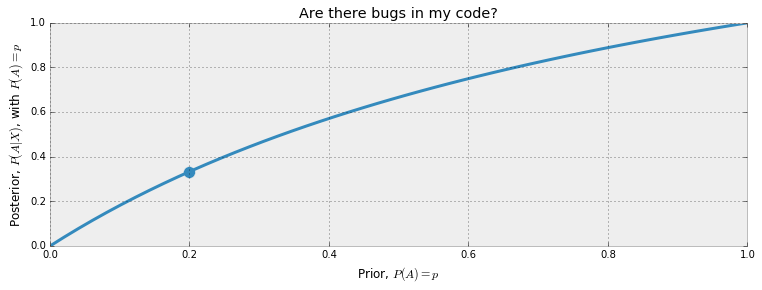

In [2]:
figsize(12.5, 4)
p = np.linspace(0, 1, 50)
plt.plot(p, 2*p/(1+p), color="#348ABD", lw=3)
#plt.fill_between(p, 2*p/(1+p), alpha=.5, facecolor=["#A60628"])
plt.scatter(0.2, 2*(0.2)/1.2, s=140, c="#348ABD")
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel("Prior, $P(A) = p$")
plt.ylabel("Posterior, $P(A|X)$, with $P(A) = p$")
plt.title("Are there bugs in my code?");

Podemos ver las ganancias más grandes si observamos que las pruebas de $ X $ pasaban cuando la probabilidad previa, $ P $, es baja.Vamos a instalarse en un valor específico para el anterior.Soy un programador fuerte (creo), así que voy a darme una realista antes de 0.20, es decir, hay un 20% de probabilidad de que escribo el código libre de errores.Para ser más realistas, esta previa debe ser una función de lo complicado y lo grande que es el código, pero lo pidamos a 0.20.Entonces, mi creencia actualizada de que mi código es libre de errores es 0.33.

Recuerde que lo anterior es una probabilidad: $ P $ es la probabilidad previa de que no haya errores *, por lo que $ 1-P $ es la probabilidad previa de que haya errores *.

De manera similar, nuestra posterior también es una probabilidad, con $ P (a | x) $ la probabilidad de que no haya un error * dado que vimos todas las pruebas pass *, por lo tanto, $ 1-P (a | x) $ es la probabilidad de que haya un error* Dadas todas las pruebas pasadas *.¿Cómo se ve nuestra probabilidad posterior?A continuación se muestra un gráfico tanto de las probabilidades previas como las posteriores.


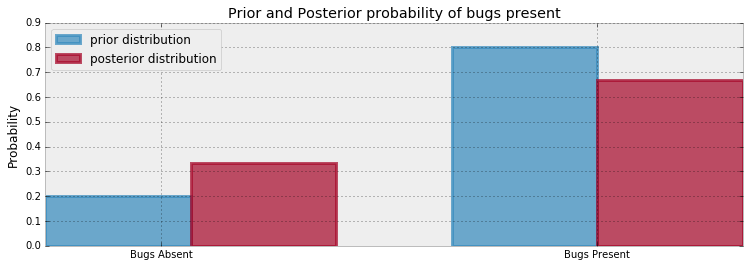

In [3]:
figsize(12.5, 4)
colours = ["#348ABD", "#A60628"]

prior = [0.20, 0.80]
posterior = [1./3, 2./3]
plt.bar([0, .7], prior, alpha=0.70, width=0.25,
        color=colours[0], label="prior distribution",
        lw="3", edgecolor=colours[0])

plt.bar([0+0.25, .7+0.25], posterior, alpha=0.7,
        width=0.25, color=colours[1],
        label="posterior distribution",
        lw="3", edgecolor=colours[1])

plt.xticks([0.20, .95], ["Bugs Absent", "Bugs Present"])
plt.title("Prior and Posterior probability of bugs present")
plt.ylabel("Probability")
plt.legend(loc="upper left");

Observe que después de que ocurrieron $ X $, se produce la probabilidad de que los errores están ausentes aumentan.Al aumentar el número de pruebas, podemos acercarnos a la confianza (probabilidad 1) que no hay errores presentes.

Este fue un ejemplo muy simple de la inferencia bayesiana y la regla de Bayes.Desafortunadamente, las matemáticas necesarias para realizar una inferencia bayesiana más complicada solo se vuelven más difíciles, a excepción de los casos construidos artificialmente.Más adelante veremos que este tipo de análisis matemático es en realidad innecesario.Primero debemos ampliar nuestras herramientas de modelado.La siguiente sección trata con * distribuciones de probabilidad *.Si ya está familiarizado, siéntase libre de omitir (o al menos SKIM), pero para los menos familiares, la siguiente sección es esencial.

_______
## Distribuciones de probabilidad


** Recordemos rápidamente lo que una distribución de probabilidad es: ** Deja que $ Z $ sea una variable aleatoria. Luego, asociado con $ z $ es una función de distribución de probabilidad * que asigna probabilidades a los diferentes resultados que pueden tomar $ z $. Gráficamente, una distribución de probabilidad es una curva donde la probabilidad de un resultado es proporcional a la altura de la curva. Puedes ver ejemplos en la primera figura de este capítulo.

Podemos dividir variables aleatorias en tres clasificaciones:

- ** $ z $ es discreto **: Las variables aleatorias discretas solo pueden asumir valores en una lista específica. Cosas como poblaciones, calificaciones de películas y número de votos son todas las variables aleatorias discretas. Las variables aleatorias discretas se vuelven más claras cuando los contrastamos con ...

- ** $ z $ es continuo **: la variable aleatoria continua puede asumir valores arbitrariamente exactos. Por ejemplo, la temperatura, la velocidad, el tiempo, el color se modelan como variables continuas porque puede hacer que los valores progresivamente sean cada vez más precisos.

- ** $ z $ se mezcla **: las variables aleatorias mixtas asignan probabilidades a las variables aleatorias tanto discretas como continuas, es una combinación de las dos categorías anteriores.

### caso discreto
Si $ z $ es discreta, entonces su distribución se llama una función de masa de probabilidad *, que mide la probabilidad de $ z $ toma el valor $ k $, denotado $ P (Z = k) $. Tenga en cuenta que la función de la masa de probabilidad describe completamente la variable aleatoria $ z $, es decir, si conocemos la función masiva, sabemos cómo se debe comportar $ z $. Hay funciones de masa de probabilidad popular que aparecen constantemente: los presentaremos según sea necesario, pero introduzcamos la primera función de masa de probabilidad muy útil. Decimos $ z $ es * Poisson * -Distribuido si:

$$ P (z = k) = \ frac {\ lambda ^ k e ^ {- \ lambda}} {k!}, \; \; k = 0,1,2, \ puntos $$

$ \ lambda $ se llama un parámetro de la distribución, y controla la forma de la distribución. Para la distribución de Poisson, $ \ lambda $ puede ser cualquier número positivo. Al aumentar $ \ lambda $, agregamos más probabilidad a los valores más grandes, y a la inversa, disminuyendo $ \ lambda $, agregamos más probabilidad a valores más pequeños. Uno puede describir $ \ lambda $ como la * Intensidad * de la distribución de Poisson.

A diferencia de $ \ lambda $, que puede ser cualquier número positivo, el valor $ K $ en la fórmula anterior debe ser un entero no negativo, es decir, $ K $ debe tomar valores 0,1,2, y así sucesivamente. Esto es muy importante, porque si quisiera modelar una población, no podría tener sentido de las poblaciones con 4.25 o 5.612 miembros.

Si una variable aleatoria $ Z $ tiene una distribución de masa de Poisson, denotamos esto escribiendo

$$ Z \ SIM \ Text {POI} (\ lambda) $$

Una propiedad útil de la distribución de Poisson es que su valor esperado es igual a su parámetro, es decir:

$$ E \ grande [\; z \; | \; \ lambda \; \ grande] = \ lambda $$

Usaremos esta propiedad a menudo, por lo que es útil recordar. A continuación, trazamos la distribución de masas de probabilidad para diferentes valores de $ \ lambda $. Lo primero que debe notar es que al aumentar $ \ lambda $, agregamos más probabilidad de que ocurran valores más grandes. En segundo lugar, observe que aunque la gráfica termina a las 15, las distribuciones no lo hacen. Asignan probabilidad positiva a cada entero no negativo.

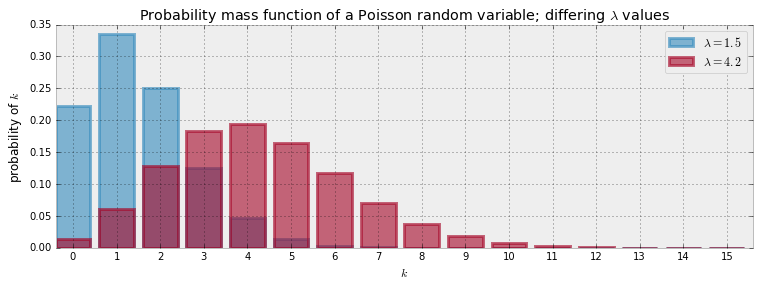

In [4]:
figsize(12.5, 4)

import scipy.stats as stats
a = np.arange(16)
poi = stats.poisson
lambda_ = [1.5, 4.25]
colours = ["#348ABD", "#A60628"]

plt.bar(a, poi.pmf(a, lambda_[0]), color=colours[0],
        label="$\lambda = %.1f$" % lambda_[0], alpha=0.60,
        edgecolor=colours[0], lw="3")

plt.bar(a, poi.pmf(a, lambda_[1]), color=colours[1],
        label="$\lambda = %.1f$" % lambda_[1], alpha=0.60,
        edgecolor=colours[1], lw="3")

plt.xticks(a + 0.4, a)
plt.legend()
plt.ylabel("probability of $k$")
plt.xlabel("$k$")
plt.title("Probability mass function of a Poisson random variable; differing \
$\lambda$ values");

### caso continuo
En lugar de una función de en masa de probabilidad, una variable aleatoria continua tiene una función de densidad de probabilidad *. Esto podría parecer una nomenclatura innecesaria, pero la función de densidad y la función de masa son criaturas muy diferentes. Un ejemplo de la variable aleatoria continua es una variable aleatoria con * densidad exponencial *. La función de densidad para una variable aleatoria exponencial se ve así:

$$ F_Z (z | \ lambda) = \ lambda e ^ {- \ lambda z}, \; \; z \ ge 0 $$

Al igual que una variable aleatoria de Poisson, una variable aleatoria exponencial puede asumir solo valores no negativos. Pero a diferencia de una variable de Poisson, la exponencial puede asumir los valores no negativos, incluidos los valores no integrales, como 4.25 o 5.612401. Esta propiedad lo convierte en una mala opción para los datos de conteo, que deben ser un número entero, pero una gran opción para los datos de tiempo, los datos de temperatura (medidos en Kelvins, por supuesto), o cualquier otra variable precisa * y positiva *. La siguiente gráfica muestra dos funciones de densidad de probabilidad con diferentes valores de $ \ lambda $.

Cuando una variable aleatoria $ z $ tiene una distribución exponencial con parámetro $ \ lambda $, decimos * $ z $ es exponencial * y escribe

$$ z \ sim \ texto {exp} (\ lambda) $$

Dado un $ \ lambda $, el valor esperado de una variable aleatoria exponencial es igual a la inversa de $ \ lambda $, es decir:

$$ E [\; Z \; | \; \ lambda \;] = \ frac {1} {\ lambda} $$

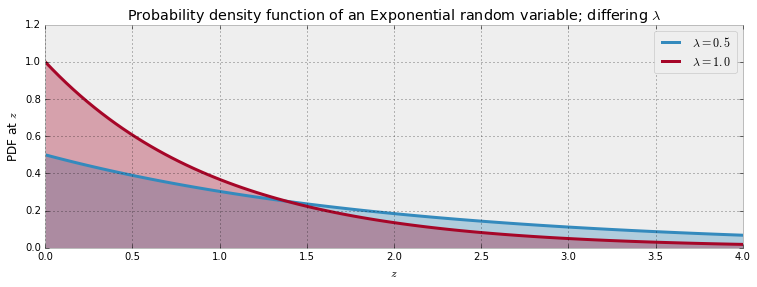

In [5]:
a = np.linspace(0, 4, 100)
expo = stats.expon
lambda_ = [0.5, 1]

for l, c in zip(lambda_, colours):
    plt.plot(a, expo.pdf(a, scale=1./l), lw=3,
             color=c, label="$\lambda = %.1f$" % l)
    plt.fill_between(a, expo.pdf(a, scale=1./l), color=c, alpha=.33)

plt.legend()
plt.ylabel("PDF at $z$")
plt.xlabel("$z$")
plt.ylim(0,1.2)
plt.title("Probability density function of an Exponential random variable;\
 differing $\lambda$");

### ¿Pero qué es $ \ lambda \; $?


** Esta pregunta es lo que motiva las estadísticas **. En el mundo real, $ \ lambda $ está oculto de nosotros. Solo vemos $ z $, y debe ir hacia atrás para tratar de determinar $ \ lambda $. El problema es difícil porque no hay un mapeo de uno a uno de $ z $ a $ \ lambda $. Se han creado muchos métodos diferentes para resolver el problema de estimar $ \ lambda $, pero desde $ \ lambda $ nunca se ha observado, nadie puede decir con certeza, ¿qué método es mejor?

La inferencia bayesiana se ocupa de las creencias * sobre qué $ \ lambda $ podría ser. En lugar de tratar de adivinar $ \ lambda $ exactamente, solo podemos hablar de lo que es probable que sea $ \ lambda $ al asignar una distribución de probabilidad a $ \ lambda $.

Esto podría parecer extraño al principio. Después de todo, se soluciona $ \ lambda $; ¡No es (necesariamente) al azar! ¿Cómo podemos asignar probabilidades a los valores de una variable no aleatoria? Ah, hemos caído por nuestra forma de pensar vieja y frecuente. Recuerde que bajo la filosofía de Bayesia, nosotros * podemos * asignar probabilidades si los interpretamos como creencias. Y es totalmente aceptable tener * creencias * sobre el parámetro $ \ lambda $.

##### Ejemplo: inferir el comportamiento de los datos de mensajes de texto

Intentemos modelar un ejemplo más interesante, uno que concierne a la tasa a la que un usuario envía y recibe mensajes de texto:

> Se le da una serie de recuentos diarios de mensajes de texto de un usuario de su sistema.Los datos, trazados con el tiempo, aparecen en la tabla a continuación.Tiene curiosidad por saber si los hábitos de mensajes de texto del usuario han cambiado con el tiempo, ya sea gradualmente o repentinamente.¿Cómo puedes modelar esto?(De hecho, estos son mis propios datos de mensajes de texto. Juzga mi popularidad como desee).

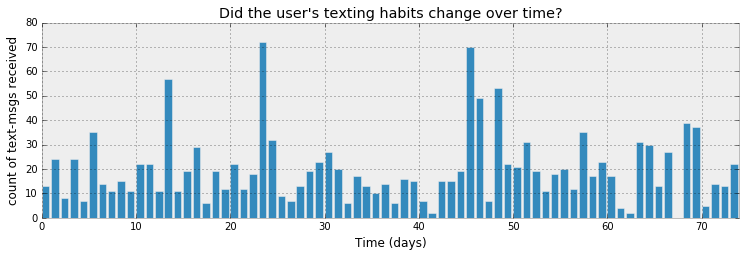

In [6]:
figsize(12.5, 3.5)
count_data = np.loadtxt("data/txtdata.csv")
n_count_data = len(count_data)
plt.bar(np.arange(n_count_data), count_data, color="#348ABD")
plt.xlabel("Time (days)")
plt.ylabel("count of text-msgs received")
plt.title("Did the user's texting habits change over time?")
plt.xlim(0, n_count_data);

Antes de comenzar a modelar, vea lo que puede descubrir simplemente mirando el gráfico anterior. ¿Diría que hubo un cambio en el comportamiento durante este período de tiempo?

¿Cómo podemos comenzar a modelar esto? Bueno, como ya hemos visto convenientemente, una variable aleatoria de Poisson es un modelo muy apropiado para este tipo de datos * de conteo *. Denoting Day $ I $ 'S Mensaje de texto por $ C_I $,

$$ c_i \ sim \ text {Poisson} (\ lambda) $$

Sin embargo, no estamos seguros de cuál es el valor del parámetro $ \ lambda $. Mirando la tabla anterior, parece que la tasa podría ser más alta al final del período de observación, lo que es equivalente a decir que $ \ lambda $ aumenta en algún momento durante las observaciones. (Recuerde que un valor más alto de $ \ lambda $ asigna más probabilidad a resultados más grandes. Es decir, hay una mayor probabilidad de que se hayan enviado muchos mensajes de texto en un día determinado).

¿Cómo podemos representar esta observación matemáticamente? Supongamos que algún día durante el período de observación (llámelo $ \ tau $), el parámetro $ \ lambda $ de repente salta a un valor más alto. Así que realmente tenemos dos parámetros $ \ lambda $: uno para el período anterior a $ \ tau $, y uno para el resto del período de observación. En la literatura, una transición repentina como esta se llamaría *punto de conmutación *:

$$
\lambda = 
\begin{cases}
\lambda_1  & \text{if } t \lt \tau \cr
\lambda_2 & \text{if } t \ge \tau
\end{cases}
$$


Si, en realidad, no se produjo un cambio repentino y, de hecho, $ \ lambda_1 = \ lambda_2 $, entonces las distribuciones posteriores de $ \ lambda $ s deben considerarse igual.

Estamos interesados en inferir el desconocido $ \ lambda $ s.Para usar la inferencia bayesiana, debemos asignar probabilidades previas a los diferentes valores posibles de $ \ lambda $.¿Cuáles serían las buenas distribuciones de probabilidad previa por $ \ lambda_1 $ y $ \ lambda_2 $?Recordar que $ \ lambda $ puede ser cualquier número positivo.Como vimos anteriormente, la distribución * exponencial * proporciona una función de densidad continua para números positivos, por lo que podría ser una buena opción para modelar $ \ lambda_i $.Pero recuerde que la distribución exponencial toma un parámetro propio, por lo que tendremos que incluir ese parámetro en nuestro modelo.Llamemos a ese parámetro $ \ Alpha $.

\begin{align}
&\lambda_1 \sim \text{Exp}( \alpha ) \\\
&\lambda_2 \sim \text{Exp}( \alpha )
\end{align}
$ \ Alpha $ se llama a * Hyper-Parameter * o * Parent Variable *. En términos literales, es un parámetro que influye en otros parámetros. Nuestra conjetura inicial a $ \ Alpha $ no influye en el modelo con demasiada fuerza, por lo que tenemos cierta flexibilidad en nuestra elección. Una buena regla general es establecer el parámetro exponencial igual a la inversa del promedio de los datos de conteo. Dado que estamos modelando $ \ lambda $ utilizando una distribución exponencial, podemos usar la identidad del valor esperado que se muestra antes para obtener:

$$ \ frac {1} {n} \ sum_ {i = 0} ^ n \; c_i \ aprox e [\; \ lambda \; | \; \ alfa] = \ frac {1} {\ alfa} $$

Una alternativa, y algo que animo al lector a probar, sería tener dos primos: uno por cada $ \ lambda_i $. Crear dos distribuciones exponenciales con diferentes valores de $ \ alfa $ refleja nuestra creencia previa de que la tasa cambió en algún momento durante las observaciones.

¿Qué hay de $ \ tau $? Debido a la ruidez de los datos, es difícil elegir a priori cuando se haya producido $ \ tau $. En su lugar, podemos asignar una creencia previa de * uniforme * a todos los días posible. Esto es equivalente a decir

\ comienzan {align}
& \ tau \ sim \ texto {discretouniform (1,70)} \\\\\
& \ Rudotrow p (\ tau = k) = \ frac {1} {70}
\ End {align}

Entonces, después de todo esto, ¿cómo se ve nuestra distribución previa general para las variables desconocidas? Francamente, * no importa *. Lo que deberíamos entender es que es un desastre feo y complicado que involucra a símbolos, solo un matemático podría amar. Y las cosas solo se volverán más feas, más complicadas se conviertan en que nuestros modelos se conviertan. En cualquier caso, todo lo que realmente nos preocupamos es la distribución posterior.

A continuación, nos dirigimos a PYMC3, una biblioteca de Python para realizar un análisis bayesiano que no está invadido por el monstruo matemático que hemos creado.


Presentamos nuestro primer martillo: PYMC3
-----

PYMC3 es una biblioteca de Python para programar el análisis bayesiano [3]. Es una biblioteca rápida y bien mantenida. La única parte desafortunada es que su documentación faltan en ciertas áreas, especialmente aquellas que puedan brillar la brecha entre principiantes y piratas informáticos. Uno de los objetivos principales de este libro es resolver ese problema, y ​​también para demostrar por qué PYMC3 es tan genial.

Modelaremos el problema anterior usando PYMC3. Este tipo de programación se llama *Programación probabilística *, un desafortunado nombre inapropiado que invoca ideas de código generado al azar y probablemente ha confundido y asustado a los usuarios lejos de este campo. El código no es aleatorio; Es probabilístico en el sentido de que creamos modelos de probabilidad utilizando variables de programación como componentes del modelo. Los componentes del modelo son primitivas de primera clase dentro del marco PYMC3.

B. Cronin [5] tiene una descripción muy motivadora de la programación probabilística:

> Otra forma de pensar sobre esto: a diferencia de un programa tradicional, que solo se ejecuta en las direcciones hacia adelante, se ejecuta un programa probabilístico tanto en la dirección hacia adelante como hacia atrás. Se ejecuta para calcular las consecuencias de las suposiciones que contiene sobre el mundo (es decir, el espacio modelo que representa), pero también se extiende desde los datos para restringir las posibles explicaciones. En la práctica, muchos sistemas de programación probabilística intercalará inteligentemente estas operaciones hacia adelante y hacia atrás para que sean de manera eficiente en las mejores explicaciones.

Debido a la confusión engendrada por el término *programación probabilística *, me abstendré de usarla. En cambio, simplemente diré *Programación *, ya que eso es realmente.

El código PYMC3 es fácil de leer. La única cosa novedosa debería ser la sintaxis. Simplemente recuerde que estamos representando los componentes del modelo ($ \ tau, \ lambda_1, \ lambda_2 $) como variables.

In [7]:
import pymc3 as pm

with pm.Model() as model:
    alpha = 1.0/count_data.mean()  # Recall count_data is the
                                   # variable that holds our txt counts
    lambda_1 = pm.Exponential("lambda_1", alpha)
    lambda_2 = pm.Exponential("lambda_2", alpha)
    
    tau = pm.DiscreteUniform("tau", lower=0, upper=n_count_data - 1)

Applied log-transform to lambda_1 and added transformed lambda_1_log_ to model.
Applied log-transform to lambda_2 and added transformed lambda_2_log_ to model.


En el código anterior, creamos las variables PYMC3 correspondientes a $ \ lambda_1 $ y $ \ lambda_2 $.Los asignamos a las variables estocásticas * de PYMC3 *, llamada así porque son tratadas por el extremo posterior como generadores de números aleatorios.

In [8]:
with model:
    idx = np.arange(n_count_data) # Index
    lambda_ = pm.math.switch(tau > idx, lambda_1, lambda_2)

Este código crea una nueva función `lambda_ ', pero en realidad podemos pensar en ello como una variable aleatoria: la variable aleatoria $ \ lambda $ desde arriba.La función 'swithch () `asigna` lambda_1' o `lambda_2 'como el valor de` lambda_', dependiendo de qué lado de "Tau" estamos encendidos.Los valores de `lambda_ up hasta 'tau' son` lambda_1 'y los valores después son `lambda_2`.

Tenga en cuenta que debido a que `lambda_1`,` lambda_2 'y `tau es aleatorio,` lambda_` será aleatorio.No somos ** no ** fijando ninguna variable todavía.

In [9]:
with model:
    observation = pm.Poisson("obs", lambda_, observed=count_data)

The variable `observation` combines our data, `count_data`, with our proposed data-generation scheme, given by the variable `lambda_`, through the `observed` keyword. 

The code below will be explained in Chapter 3, but I show it here so you can see where our results come from. One can think of it as a *learning* step. The machinery being employed is called *Markov Chain Monte Carlo* (MCMC), which I also delay explaining until Chapter 3. This technique returns thousands of random variables from the posterior distributions of $\lambda_1, \lambda_2$ and $\tau$. We can plot a histogram of the random variables to see what the posterior distributions look like. Below, we collect the samples (called *traces* in the MCMC literature) into histograms.

In [10]:
### Mysterious code to be explained in Chapter 3.
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000, step=step, return_inferencedata=False)

100%|██████████| 10000/10000 [00:02<00:00, 4511.50it/s]


In [11]:
lambda_1_samples = trace['lambda_1']
lambda_2_samples = trace['lambda_2']
tau_samples = trace['tau']

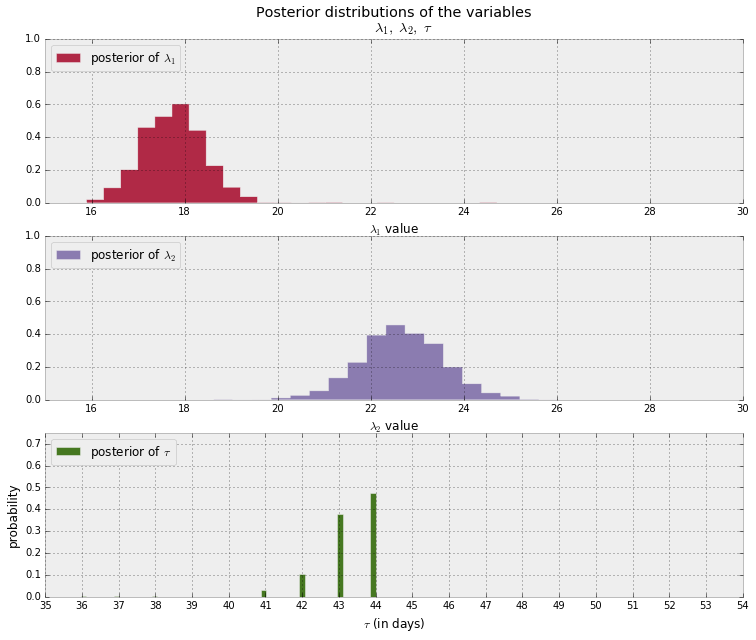

In [12]:
figsize(12.5, 10)
#histogram of the samples:

ax = plt.subplot(311)
ax.set_autoscaley_on(False)

plt.hist(lambda_1_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_1$", color="#A60628", density=True)
plt.legend(loc="upper left")
plt.title(r"""Posterior distributions of the variables
    $\lambda_1,\;\lambda_2,\;\tau$""")
plt.xlim([15, 30])
plt.xlabel("$\lambda_1$ value")

ax = plt.subplot(312)
ax.set_autoscaley_on(False)
plt.hist(lambda_2_samples, histtype='stepfilled', bins=30, alpha=0.85,
         label="posterior of $\lambda_2$", color="#7A68A6", density=True)
plt.legend(loc="upper left")
plt.xlim([15, 30])
plt.xlabel("$\lambda_2$ value")

plt.subplot(313)
w = 1.0 / tau_samples.shape[0] * np.ones_like(tau_samples)
plt.hist(tau_samples, bins=n_count_data, alpha=1,
         label=r"posterior of $\tau$",
         color="#467821", weights=w, rwidth=2.)
plt.xticks(np.arange(n_count_data))

plt.legend(loc="upper left")
plt.ylim([0, .75])
plt.xlim([35, len(count_data)-20])
plt.xlabel(r"$\tau$ (in days)")
plt.ylabel("probability");

### Interpretation

Recall that Bayesian methodology returns a *distribution*. Hence we now have distributions to describe the unknown $\lambda$s and $\tau$. What have we gained? Immediately, we can see the uncertainty in our estimates: the wider the distribution, the less certain our posterior belief should be. We can also see what the plausible values for the parameters are: $\lambda_1$ is around 18 and $\lambda_2$ is around 23. The posterior distributions of the two $\lambda$s are clearly distinct, indicating that it is indeed likely that there was a change in the user's text-message behaviour.

What other observations can you make? If you look at the original data again, do these results seem reasonable? 

Notice also that the posterior distributions for the $\lambda$s do not look like exponential distributions, even though our priors for these variables were exponential. In fact, the posterior distributions are not really of any form that we recognize from the original model. But that's OK! This is one of the benefits of taking a computational point of view. If we had instead done this analysis using mathematical approaches, we would have been stuck with an analytically intractable (and messy) distribution. Our use of a computational approach makes us indifferent to mathematical tractability.

Our analysis also returned a distribution for $\tau$. Its posterior distribution looks a little different from the other two because it is a discrete random variable, so it doesn't assign probabilities to intervals. We can see that near day 45, there was a 50% chance that the user's behaviour changed. Had no change occurred, or had the change been gradual over time, the posterior distribution of $\tau$ would have been more spread out, reflecting that many days were plausible candidates for $\tau$. By contrast, in the actual results we see that only three or four days make any sense as potential transition points. 

### Why would I want samples from the posterior, anyways?


We will deal with this question for the remainder of the book, and it is an understatement to say that it will lead us to some amazing results. For now, let's end this chapter with one more example.

We'll use the posterior samples to answer the following question: what is the expected number of texts at day $t, \; 0 \le t \le 70$ ? Recall that the expected value of a Poisson variable is equal to its parameter $\lambda$. Therefore, the question is equivalent to *what is the expected value of $\lambda$ at time $t$*?

In the code below, let $i$ index samples from the posterior distributions. Given a day $t$, we average over all possible $\lambda_i$ for that day $t$, using $\lambda_i = \lambda_{1,i}$ if $t \lt \tau_i$ (that is, if the behaviour change has not yet occurred), else we use $\lambda_i = \lambda_{2,i}$. 

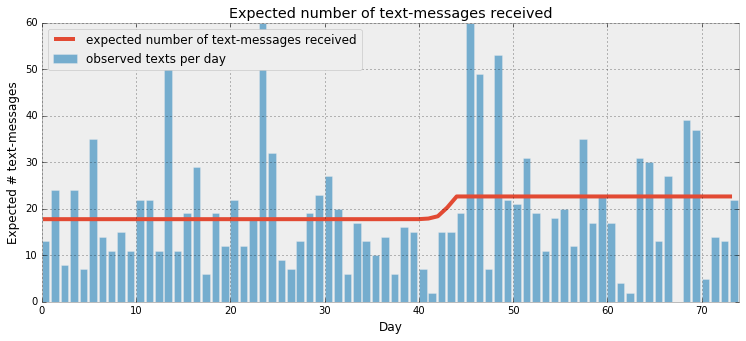

In [13]:
figsize(12.5, 5)
# tau_samples, lambda_1_samples, lambda_2_samples contain
# N samples from the corresponding posterior distribution
N = tau_samples.shape[0]
expected_texts_per_day = np.zeros(n_count_data)
for day in range(0, n_count_data):
    # ix is a bool index of all tau samples corresponding to
    # the switchpoint occurring prior to value of 'day'
    ix = day < tau_samples
    # Each posterior sample corresponds to a value for tau.
    # for each day, that value of tau indicates whether we're "before"
    # (in the lambda1 "regime") or
    #  "after" (in the lambda2 "regime") the switchpoint.
    # by taking the posterior sample of lambda1/2 accordingly, we can average
    # over all samples to get an expected value for lambda on that day.
    # As explained, the "message count" random variable is Poisson distributed,
    # and therefore lambda (the poisson parameter) is the expected value of
    # "message count".
    expected_texts_per_day[day] = (lambda_1_samples[ix].sum()
                                   + lambda_2_samples[~ix].sum()) / N


plt.plot(range(n_count_data), expected_texts_per_day, lw=4, color="#E24A33",
         label="expected number of text-messages received")
plt.xlim(0, n_count_data)
plt.xlabel("Day")
plt.ylabel("Expected # text-messages")
plt.title("Expected number of text-messages received")
plt.ylim(0, 60)
plt.bar(np.arange(len(count_data)), count_data, color="#348ABD", alpha=0.65,
        label="observed texts per day")

plt.legend(loc="upper left");

Our analysis shows strong support for believing the user's behavior did change ($\lambda_1$ would have been close in value to $\lambda_2$ had this not been true), and that the change was sudden rather than gradual (as demonstrated by $\tau$'s strongly peaked posterior distribution). We can speculate what might have caused this: a cheaper text-message rate, a recent weather-to-text subscription, or perhaps a new relationship. (In fact, the 45th day corresponds to Christmas, and I moved away to Toronto the next month, leaving a girlfriend behind.)


##### Exercises

1\.  Using `lambda_1_samples` and `lambda_2_samples`, what is the mean of the posterior distributions of $\lambda_1$ and $\lambda_2$?

In [14]:
#type your code here.

2\.  What is the expected percentage increase in text-message rates? `hint:` compute the mean of `lambda_1_samples/lambda_2_samples`. Note that this quantity is very different from `lambda_1_samples.mean()/lambda_2_samples.mean()`.

In [15]:
#type your code here.

3\. What is the mean of $\lambda_1$ **given** that we know $\tau$ is less than 45.  That is, suppose we have been given new information that the change in behaviour occurred prior to day 45. What is the expected value of $\lambda_1$ now? (You do not need to redo the PyMC3 part. Just consider all instances where `tau_samples < 45`.)

In [16]:
#type your code here.

### References


-  [1] Gelman, Andrew. N.p.. Web. 22 Jan 2013. [N is never large enough](http://andrewgelman.com/2005/07/31/n_is_never_larg).
-  [2] Norvig, Peter. 2009. [The Unreasonable Effectiveness of Data](http://static.googleusercontent.com/media/research.google.com/en//pubs/archive/35179.pdf).
- [3] Salvatier, J, Wiecki TV, and Fonnesbeck C. (2016) Probabilistic programming in Python using PyMC3. *PeerJ Computer Science* 2:e55 <https://doi.org/10.7717/peerj-cs.55>
- [4] Jimmy Lin and Alek Kolcz. Large-Scale Machine Learning at Twitter. Proceedings of the 2012 ACM SIGMOD International Conference on Management of Data (SIGMOD 2012), pages 793-804, May 2012, Scottsdale, Arizona.
- [5] Cronin, Beau. "Why Probabilistic Programming Matters." 24 Mar 2013. Google, Online Posting to Google . Web. 24 Mar. 2013. <https://plus.google.com/u/0/107971134877020469960/posts/KpeRdJKR6Z1>.

In [1]:
from IPython.core.display import HTML
def css_styling():
    styles = open("../styles/custom.css", "r").read()
    return HTML(styles)
css_styling()